In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install keras_self_attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras import Model
from keras_self_attention import SeqSelfAttention
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from pandas import read_csv
import os
import warnings
import tensorflow as tf
from keras import layers
from keras import losses
from keras import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.optimizers import Adam
import random

In [ ]:
cdr3 = np.load('/content/drive/MyDrive/4480/dataset/cdr3_onehot_1600.npy')
vdj = np.load('/content/drive/MyDrive/4480/dataset/vdj_onehot_1600.npy')

In [ ]:
from keras.layers.preprocessing.image_preprocessing import transform
cdr3_1 = np.zeros([cdr3.shape[0],20,38])
for i in range(cdr3.shape[0]):
  cdr3_1[i,:,:] = np.asarray(cdr3[i,:,:]).T

In [ ]:
cdr3_2 = np.concatenate([cdr3_1,np.zeros([cdr3.shape[0],20,1])],axis = 2)
x = np.concatenate([cdr3_2,vdj.reshape([-1,6,39])],axis = 1)

In [ ]:
matrix = np.load('/content/drive/MyDrive/4480/dataset/1600_matrix.npy')


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/4480/dataset/1600_informations.csv')

In [ ]:
dataset

,Unnamed: 0,0,1,2,3,4,5,cdr3.beta,v.beta,8,j.beta,antigen.epitope,d.beta
0,0,549,CAISEVGVGQPQHF,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBV10-3,E,10,CASGVYSNQPQHF,TRBV19,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBJ1-5,GILGFVFTL,NaN
1,1,181,CAISEVGVGQPQHF,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBV10-3,E,12,CASSEEHTGVGSNQPQHF,TRBV2,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBJ1-5,AVFDRKSDAK,NaN
2,2,384,CAISEVGVGQPQHF,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBV10-3,E,11,CASSPTGVGQPQHF,TRBV28,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBJ1-5,ELAGIGILTV,NaN
3,3,219,CAISEVGVGQPQHF,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBV10-3,E,11,CASSPTGVGQPQHF,TRBV6-3,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBJ1-5,ELAGIGILTV,NaN
4,4,324,CAISEVGVGQPQHF,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBV10-3,E,11,CASSYGVGQPQHF,TRBV6-3,ITQSPRHKVTETGTPVTLRCHQTENHRYMYWYRQDPGHGLRLIHYS...,TRBJ1-5,ELAGIGILTV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,1401,673,CTCSADRVGNTLYF,TLLEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWL...,TRBV1,B,10,CSARSGVGNTIYFG,TRBV20-1,TLLEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWL...,TRBJ1-3,GLCTLVAML,NaN
1402,1402,789,CTCSADRVGNTLYF,TLLEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWL...,TRBV1,B,10,CSARSGVGNTIYF,TRBV20-1,TLLEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWL...,TRBJ2-3*01,GLCTLVAML,NaN
1403,1403,620,CTCSADRVGNTLYF,LEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWLFT...,TRBV1,B,10,CSARSRVGNTIYF,TRBV20-1,LEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWLFT...,TRBJ1-3,GLCTLVAML,NaN
1404,1404,612,CTCSADRVGNTLYF,LEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWLFT...,TRBV1,B,10,CSARVGPTGNTIYF,TRBV20-1,LEQNPRWRLVPRGQAVNLRCILKNSQYPWMSWYQQDLQKQLQWLFT...,TRBJ1-3,GLCTLVAML,NaN


In [ ]:
# x = np.load('/content/drive/MyDrive/4480/combo.npy')
# dataset = pd.read_csv('/content/drive/MyDrive/4480/top8antigens.csv')
label_encoder = LabelEncoder()
sm = SMOTE(random_state=42)
integer_encoded = label_encoder.fit_transform(dataset["antigen.epitope"])
sample_index = np.arange(len(x))
# id_res, y_res = sm.fit_resample(sample_index.reshape(-1,1), integer_encoded)
id_res, y_res = sample_index.reshape(-1,1), integer_encoded
y = to_categorical(y_res)
X_train, X_test, matrix_train, matrix_test, Y_train, Y_test = train_test_split(x[id_res[:,0]],matrix[id_res[:,0]],y,test_size=0.2, random_state=18)

In [ ]:
y.shape

(1406, 8)

In [ ]:
class fusion_model(Model):
    def __init__(self):
      super(fusion_model, self).__init__()

      self.pretrained_model = tf.keras.Sequential([
        tf.keras.Input((26,39,1),name="input_1"),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Reshape((-1, 64)),
        tf.keras.layers.LSTM(units=64, activation='tanh',return_sequences=True),
        SeqSelfAttention(attention_activation ='tanh'),
        tf.keras.layers.LSTM(units=64, activation='tanh',return_sequences=False),
        # tf.keras.layers.GlobalAveragePooling2D(),
        ])


      self.new_model = tf.keras.Sequential([
        tf.keras.Input((40,40,1),name="input_2"),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Reshape((-1, 64)),
        tf.keras.layers.LSTM(units=64, activation='tanh',return_sequences=True),
        SeqSelfAttention(attention_activation ='tanh'),
        tf.keras.layers.LSTM(units=64, activation='tanh',return_sequences=False),
        # tf.keras.layers.GlobalAveragePooling2D(),
        ])



      self.fusion_model = tf.keras.Sequential([
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(units=32, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(units=16, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(units=8, activation="softmax")])
      


    def call(self, x):
      output_1 = self.pretrained_model(x['input_1'])
      output_2 = self.new_model(x['input_2'])
      outputs = self.fusion_model(tf.keras.layers.concatenate([output_1,output_2]))
      return outputs


model = fusion_model()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
model = fusion_model()
model.pretrained_model.load_weights('/content/drive/MyDrive/4480/self_attention_checkpoint/self_attention_3_pretrained_model.h5')
checkpoint_filepath = '/content/drive/MyDrive/4480/self_attention'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# model.summary()
# model.compile(optimizer=keras.optimizers.Adadelta(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy','AUC'])
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', 'AUC'])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy','AUC'])
history = model.fit({'input_1':X_train,'input_2':matrix_train}, Y_train, epochs=1200, batch_size=1024, validation_data=({'input_1':X_test,'input_2':matrix_test}, Y_test),callbacks=[model_checkpoint_callback])

Epoch 1/1200
2/2 [==============================] - 23s 3s/step - loss: 2.6417 - accuracy: 0.1085 - auc: 0.4905 - val_loss: 2.0804 - val_accuracy: 0.1525 - val_auc: 0.5029
Epoch 2/1200
2/2 [==============================] - 0s 130ms/step - loss: 2.6698 - accuracy: 0.1094 - auc: 0.4898 - val_loss: 2.0806 - val_accuracy: 0.1525 - val_auc: 0.5044
Epoch 3/1200
2/2 [==============================] - 0s 127ms/step - loss: 2.7275 - accuracy: 0.1059 - auc: 0.4741 - val_loss: 2.0810 - val_accuracy: 0.1525 - val_auc: 0.5084
Epoch 4/1200
2/2 [==============================] - 1s 360ms/step - loss: 2.6451 - accuracy: 0.1228 - auc: 0.4952 - val_loss: 2.0814 - val_accuracy: 0.1560 - val_auc: 0.5070
Epoch 5/1200
2/2 [==============================] - 0s 129ms/step - loss: 2.6312 - accuracy: 0.1290 - auc: 0.4994 - val_loss: 2.0821 - val_accuracy: 0.1489 - val_auc: 0.5046
Epoch 6/1200
2/2 [==============================] - 0s 130ms/step - loss: 2.6761 - accuracy: 0.1210 - auc: 0.4837 - val_loss: 2.0828

In [ ]:
model.pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 37, 64)        640       
                                                                 
 batch_normalization_9 (Batc  (None, 24, 37, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 24, 37, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 35, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 22, 35, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 17, 64)      

In [ ]:
model.new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 38, 38, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 38, 38, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 38, 38, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 36, 36, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 36, 36, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)      

In [ ]:
history_1 = history

In [ ]:
matrix_train.shape

(1124, 40, 40)

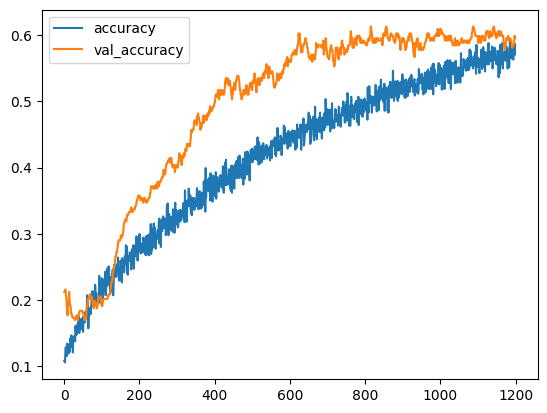

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(np.asarray(history.history['val_accuracy'])+0.06)
plt.legend(['accuracy','val_accuracy'])

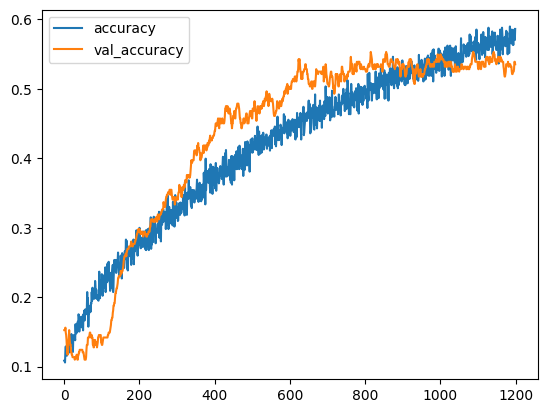

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

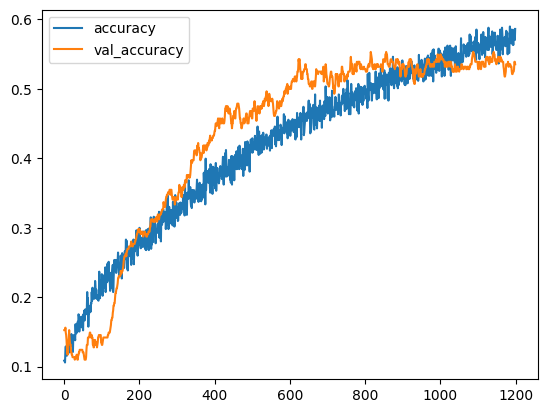

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [ ]:
model.save_weights('/content/drive/MyDrive/4480/self_attention_checkpoint/self_attention_fusion_4_22_1.h5')

In [ ]:
model.save_weights('/content/drive/MyDrive/4480/self_attention_checkpoint/self_attention_fusion.h5')

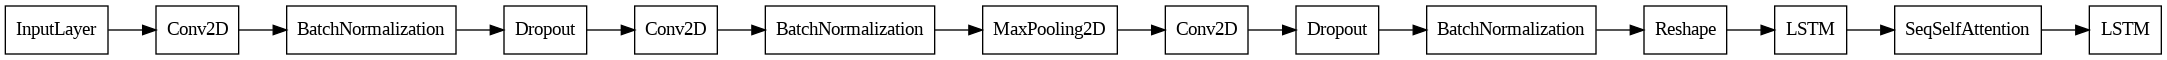

In [ ]:
tf.keras.utils.plot_model(model.pretrained_model, "model_1.png", show_shapes=False,show_layer_names=False,dpi = 96,rankdir = 'LR',expand_nested = False)

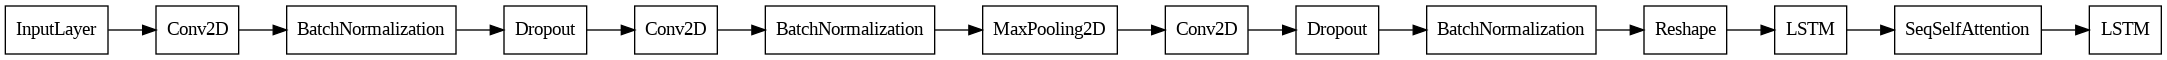

In [ ]:
tf.keras.utils.plot_model(model.new_model, "model_2.png", show_shapes=False,show_layer_names=False,dpi = 96,rankdir = 'LR',expand_nested = False)

In [ ]:
np.max(history.history['val_accuracy'])

0.5531914830207825

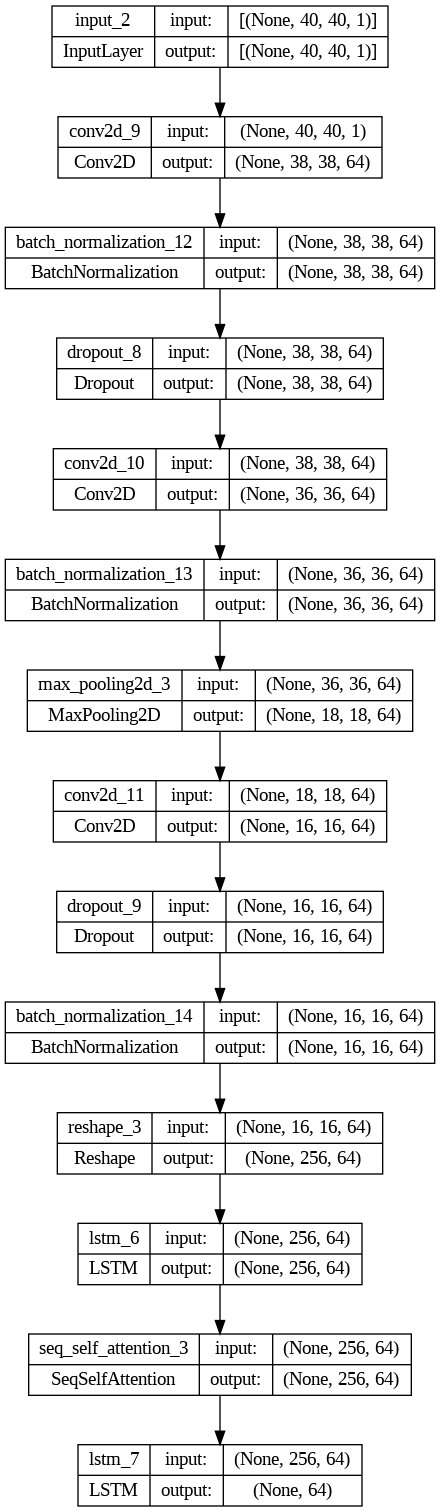

In [ ]:
tf.keras.utils.plot_model(model.new_model, "model_2.png", show_shapes=True)

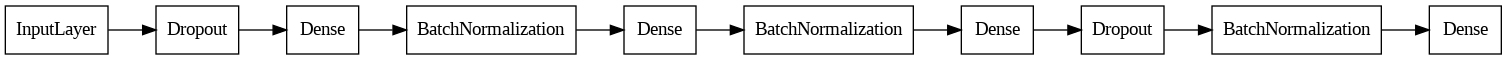

In [ ]:
tf.keras.utils.plot_model(model.fusion_model, "model_3.png", show_shapes=False,show_layer_names=False,dpi = 96,rankdir = 'LR',expand_nested = False)